# Poems dataset EDA

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import os

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

import spacy
from langdetect import detect

import re

In [2]:
path_data = "./spanish_poems_dataset.json"
df = pd.read_json(path_data, encoding="latin-1")
df.head()

,auth_name,poem_title,poem
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS<SALTO>Su nombre perdió e...
1,"Abarca de Bolea, Ana Francisca","Su nombre perdió el mal, Clorinda hermosa",LIRAS A UNAS VIRUELAS<SALTO>Su nombre perdió e...
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE<SALTO>Fuente que en círcu...
3,"Abarca de Bolea, Ana Francisca",Fuente que en círculo breve,ROMANCE A UNA FUENTE<SALTO>Fuente que en círcu...
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN<SALTO>Estrella entre verdes...


In [3]:
len(df)

49954

In [4]:
df.drop_duplicates(subset=["poem"], inplace=True)

In [5]:
len(df)

27239

In [6]:
df["poem"] = df["poem"].apply(lambda x: x.replace("<SALTO>", "\n"))

In [7]:
df

,auth_name,poem_title,poem
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN\nEstrella entre verdes hoja...
6,"Abarca de Bolea, Ana Francisca",SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...
8,"Abarca de Bolea, Ana Francisca",Recorro el parloteo de las hojas,"SONETO\nRecorro el parloteo de las hojas,\npes..."
...,...,...,...
49937,"Zorrilla, Jos",La noche no tiene ruido,"ROMANCE\n La noche no tiene ruido,\nEn la ..."
49938,"Zorrilla, Jos","Mañana voy, nazarena","ORIENTAL\n Mañana voy, nazarena,\nA Córdob..."
49939,"Zorrilla, Jos",MEDITACIÓN,MEDITACIÓN\n Sobre ignorada tumba solitari...
49941,"Zorrilla, Jos","Negra, ruinosa, sola y olvidada","TOLEDO\n I\nNegra, ruinosa..."


In [8]:
print(df.iloc[700]["poem"])

TABLA Y MANO
Delante está la mesa.
No pájaros o flores. Cuatro naipes, un vaso.
La mano está en la tabla. Tabla o mano, mezcladas no,
confusas —confundidas—.
La mano quieta asoma por un puño gastado;
rugosa, casi vegetal aparece, explora, avanza,
ya está toda visible: ahora se apoya
sobre la tabla hermana.
Un vidrio deslustrado, con un poso rojizo, está a su vera.
Este rojo color fue de oro dulce,
campo feliz, los granos rezumantes.
Pájaros inocentes volaban bajo el cielo.
Azul, azul, con el verdor de la uva.
Y los pámpanos, anchos.
Ahora la tabla, materia solo cuyo origen se oculta,
cubierta está por mucha vida que no estuvo en sus ramas.
Ella creciera en un haya graciosa.
Cerca las viñas y sus uvas claras,
ávidas de este sol que las aprieta.
Creció la tabla pura y extendió sus ramajes,
y virgen los abrió solo a los cielos.
Pero un filo feroz fue la respuesta.
Con sangre no, con savia, fue abatida,
tabla que palpitaba allí invisible,
bajo la injuria abierta.
Una sierra fue luego, su m

In [9]:
for n, a in zip(df["auth_name"].value_counts(), df["auth_name"].unique()):
    print(f"{a:35}: {n}")

Abarca de Bolea, Ana Francisca     : 533
Abente y Lago, Victorino           : 488
Aburto Uribe, Teresa               : 486
Aching Samatelo, Csar              : 478
Acosta Snchez, Juan F.             : 446
Acua, Hernando de                  : 436
Acua, Manuel                       : 430
Adames, Roberto Jos                : 427
Adrados Maestre, Enrique           : 394
Aguijonmagico                      : 373
Aguilar, Gaspar                    : 337
Aguirre, Mirta                     : 329
Aguirre y Fierro,Guillermo         : 314
Agustini, Delmira                  : 287
Ainchil, Claudia                   : 272
Akinin Levy, Samuel                : 272
Al Haded, Al                       : 256
Alarcn, Pedro Antonio de           : 252
Alba, Juan Luis                    : 252
Albano, Genaro                     : 239
Alberca, Marta                     : 233
Alberti, Rafael                    : 230
Albstur, Jacinto                   : 229
Alcntara Fdez., Orlando            : 224
Alczar, Baltasar

## Language detection

In [10]:
def detect_lang(text):
    lang = "unk"
    try:
        lang = detect(text)
    except Exception as e:
        pass
    return lang

In [11]:
df["language"] = df["poem"].apply(lambda x: detect_lang(x))

In [12]:
df["language"].unique()

array(['es', 'pt', 'ca', 'et', 'sk', 'en', 'it', 'hr', 'fr', 'unk', 'so'],
      dtype=object)

In [13]:
print(df[df["language"] == "pt"].iloc[0]["poem"])

INSOMNIO
Llueve.
Le falta Norte a mi memoria
Suicidado de espantos
Hurgo este cementerio de papeles
Para inventar insomnios
O evocar inexistencias.


In [14]:
print(df[df["language"] == "pt"].iloc[1]["poem"])

MADRID
   Por amiga, por amiga.
Sólo por amiga.
   Por amante, por querida.
Sólo por querida.
   Por esposa, no.
Sólo por amiga.


In [15]:
print(df[df["language"] == "pt"].iloc[2]["poem"])

CANTIGA LXV
 Como Santa Maria fez soltar o ome que andara gran tempo escomungado.
A creer devemos que todo pecado
Deus pola sa Madr' averá
perdõado.
Porend' un miragre vos direi mui grande
que Santa Maria fez; e ela mande
que mostra-lo possa per mi e non ande
demandand' a outre que m'en dé recado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Poren direi com' un clerig' aldeão,
de mui santa vida e mui bon crischão,
ouv' un seu feegres sobervi' e loução,
que nunca queria fazer seu mandado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
E o ome bõo sempre lle rogava
que sse corregesse e o castigava;
mais aquel vilão poren ren non dava,
assi o tragia o dem' enganado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Pois que o preste viu que mõestamento
non lle valia ren ha vez nen çento,
escomungou-o enton por escarmento,
cuidando que fosse per i castigado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Mais el

In [16]:
print(df[df["language"] == "ca"].iloc[0]["poem"])

CANTIGA XCVII
 Como Santa Maria quis guardar de morte un privado dun rey que o avian mezcrado.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
Dest' un miragre vos contarey
que en Canete, per com' achey,
a Virgen por un ome dun Rey
fez, que mezcraran, com' apres' ey;
e ben sey
que o cuidaran a fazer morrer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
De tal guisa o foron mezcrar,
que o mandou log' el Rei chamar
ante si. Mas el con gran pesar
e con coita fillou-ss' a chorar
e rogar
a Virgen quanto mais podo fazer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
Demais un rico pano y deu
na eigreja e fezo-sse seu
ome da Virgen, com' aprix eu;
e est' avia nome Mateu,
a ben leu
pode-l-an en cas del Rei connocer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
E pois na eigreja pos seu don
e fez chorando ssa oraçon,
meteu-sse ao cam' enton
con mui gran med' en seu coraçon,
de lijon
ou de morte por tal mezcra prender

In [17]:
print(df[df["language"] == "en"].iloc[0]["poem"])

FAREWELL IN THE WELFARE ISLAND
It has to come from here,
right this instance,
my cry into the world.
Life was somewhere forgotten
and sought refuge in depths of tears
and sorrows
over this vast empire of solitude
and darkness.
Where is the voice of freedom,
freedom to laugh,
to move
without the heavy phantom of despair?
Where is the form of beauty
unshaken in its veil, simple and pure?
Where is the warmth of heaven
pouring its dreams of love in broken spirits?
It has to be from here,
right this instance,
my cry into the world.
My cry that is no more mine,
but hers and his forever,
the comrades of my silence,
the phantoms of my grave.
It has to be from here,
forgotten but unshaken,
among comrades of silence
deep into Welfare Island
my farewell to the world.


In [18]:
print(df[df["language"] == "it"].iloc[0]["poem"])

EN UN ÁLBUM DE UNA PRINCESA ITALIANA
Veggo ardente nel cielo sffolgorare
de sua corona l'ornamento chiaro,
quel chi la luce dá superbo faro
e quel chi fá le piante germinare.
Veggo in la schezzia il pianto scintillare
de la matina, che á la terra è caro,
ascolto il fiume fra l'olcandro amaro
sulla pianura herbosa mormorare:
Odo l'uccelli e la sonora aureta
chi pello azurro spazzio tende il vuolo,
ma questa bello assai ridente stuolo
L'anima mia ancor non rende lietta:
sul bracio trista e languida mi piego
ch''il mio diletto ¡aimè! mai più non veggo!


Alguna falla, pero mayoritariamente está bien y creo que es positivo quedarse solo los que estén en español

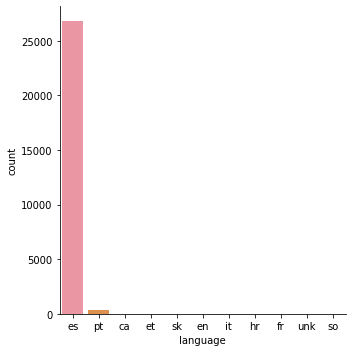

In [19]:
sns.catplot(data = df, x="language", kind="count")

No es una gran pérdida

In [20]:
df[df["language"]=="unk"]

,auth_name,poem_title,poem,language
39514,"Paz, Octavio",Topoema,,unk


In [21]:
indexes = df[df["language"] != "es"].index

In [22]:
df.drop(indexes, axis=0, inplace=True)

## Arreglar los textos

In [23]:
def clean_texts(text, df):
    title= df[df["poem"]==text].iloc[0]["poem_title"]
    text.replace(title, "", 1)
    text = re.sub(r" (?=[MDCLXVI])M*(C[MD]|D?C{0,3})(X[CL]|L?X{0,3})(I[XV]|V?I{0,3}) ", " ", text)
    text = re.sub(r"\n", "<SALTO>", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\t", "", text)
    text = re.sub(r"<SALTO>", "\n", text)
    text = text.strip()
    return text

In [24]:
df["poem"] = df["poem"].apply(lambda x: clean_texts(x, df))

## Guardar el nuevo conjunto

In [25]:
def truncate(text):
    text = text.split()
    holder = []
    text_trunc = []
    for i in text:
        holder.append(i)
        if len(holder) >= 350:
            text_trunc.append(" ".join(holder))
            holder = []
            
    if len(holder) > 0:
        text_trunc.append(" ".join(holder))
        holder = []
        
    return text_trunc

In [26]:
#df["poem"] = df["poem"].apply(lambda x: truncate(x))

In [27]:
df

,auth_name,poem_title,poem,language
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...,es
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN\nEstrella entre verdes hoja...,es
6,"Abarca de Bolea, Ana Francisca",SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,es
8,"Abarca de Bolea, Ana Francisca",Recorro el parloteo de las hojas,"SONETO\nRecorro el parloteo de las hojas,\npes...",es
...,...,...,...,...
49937,"Zorrilla, Jos",La noche no tiene ruido,"ROMANCE\n La noche no tiene ruido,\nEn la somb...",es
49938,"Zorrilla, Jos","Mañana voy, nazarena","ORIENTAL\n Mañana voy, nazarena,\nA Córdoba la...",es
49939,"Zorrilla, Jos",MEDITACIÓN,"MEDITACIÓN\n Sobre ignorada tumba solitaria,\n...",es
49941,"Zorrilla, Jos","Negra, ruinosa, sola y olvidada","TOLEDO\n I\nNegra, ruinosa, sola y olvidada,\n...",es


In [28]:
#df = df.explode("poem")

In [29]:
#df

In [30]:
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
df.to_csv("./poems_cleaned.csv")